# objective:##regression for prediction for bike count#

# business understanding#
##date:the no of bikes rented on which date is given
#rented bike:the count of rented bikes is given
#hour:for how many hours the bikes rented are given
#temperature:this gives the information of temperature in celsius
#humidity:this gives the amount of water vapour or reltive humidity  is given
#wind speed:the speed of the wind is given
#visibility:the visibility info is given
#dewpoint:it is temperature of air cooled is given
#solar radiation:it is radiant energy emitted is given
#snowfall:the amount of snowfall id given
#seasons:the bikes rented in various seasons is given
#holiday:the info of holiday or not is given
#functioning day:whether the day is a working day  or not is given

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
bike = pd.read_csv(r"C:\Users\user\Downloads\Bike.csv", encoding = "unicode_escape")

In [4]:
bike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
##here output  variable is Rented bike count#

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8755 non-null   float64
 5   Wind speed (m/s)           8723 non-null   float64
 6   Visibility (10m)           8709 non-null   float64
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8732 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
bike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8755.000000,8723.000000,8709.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.231639,1.727089,1435.025376,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.363922,1.035641,608.382767,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,936.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1693.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
#removing unnecessary columns#
del bike['Date']

In [9]:
#input variable#
x=bike.iloc[:,1:13]

In [10]:
x

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34.0,2.6,1894.0,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,20,3.4,37.0,2.3,2000.0,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,21,2.6,39.0,0.3,NaN,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,22,2.1,41.0,1.0,1859.0,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [11]:
test1=pd.DataFrame(x)

In [12]:
test1

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34.0,2.6,1894.0,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,20,3.4,37.0,2.3,2000.0,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,21,2.6,39.0,0.3,NaN,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,22,2.1,41.0,1.0,1859.0,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [13]:
#output variable#
y=bike.iloc[:,0]

In [14]:
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

In [15]:
test2=pd.DataFrame(y)

In [16]:
test2

,Rented Bike Count
0,254
1,204
2,173
3,107
4,78
...,...
8755,1003
8756,764
8757,694
8758,712


In [17]:
bike.rename(columns={'Rented Bike Count':'count','Hour':'hour','Temperature(°C)':'temp','Humidity(%)':'hum','Wind speed (m/s)':'wind'
                        ,'Visibility (10m)':'vis','Dew point temperature(°C)':'dew','Solar Radiation (MJ/m2)':'solar','Rainfall(mm)':'rain'
,'Snowfall (cm)':'snow','Seasons':'seasons','Holiday':'holiday','Functioning Day':'workingday'},inplace=True)

In [18]:
bike.head()

,count,hour,temp,hum,wind,vis,dew,solar,rain,snow,seasons,holiday,workingday
0,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# data understanding#

In [19]:
##Graphical Representation#
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

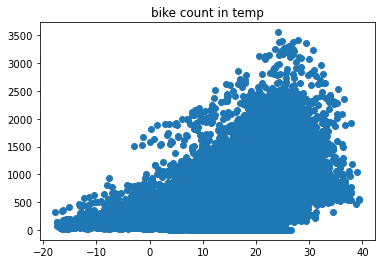

In [20]:
plt.scatter(bike[['temp']],bike['count'])
plt.title("bike count in temp")
plt.show()

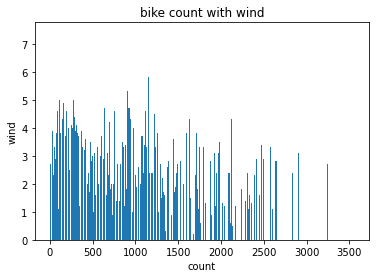

In [21]:
plt.bar(bike['count'],bike['wind'])
plt.xlabel("count")
plt.ylabel('wind')
plt.title("bike count with wind")
plt.show()

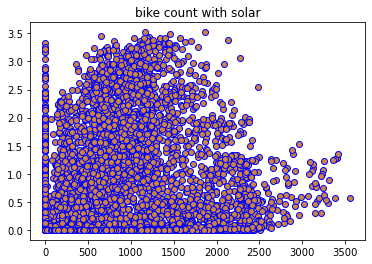

In [22]:
plt.scatter(bike['count'],bike['solar'],facecolor='peru',edgecolor='blue')
plt.title("bike count with solar")
plt.show()

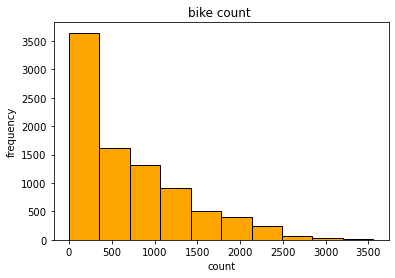

In [23]:
plt.hist(bike['count'],facecolor='orange',edgecolor='black',bins=10)
plt.xlabel("count")
plt.ylabel("frequency")
plt.title("bike count ")
plt.show()

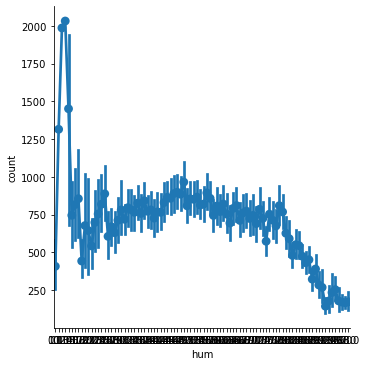

In [24]:
sns.catplot(x="hum",y="count",kind="point",data=bike)

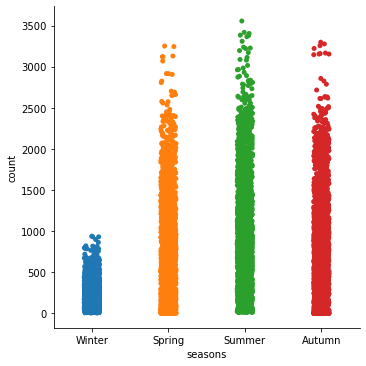

In [25]:
sns.catplot(x="seasons",y="count",data=bike)

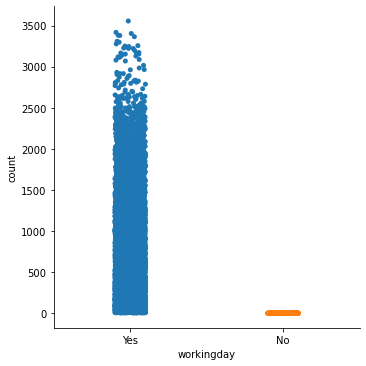

In [26]:
sns.catplot(x="workingday",y="count",data=bike)

In [27]:
##exploratory data analysis#
##first bussiness moment#
##mean.median.mode
import pandas as pd

In [28]:
import numpy as np

In [29]:
bike.mean()

count     704.602055
hour       11.500000
temp       12.882922
hum        58.231639
wind        1.727089
vis      1435.025376
dew         4.073813
solar       0.569111
rain        0.148687
snow        0.075068
dtype: float64

In [30]:
bike.median()

count     504.50
hour       11.50
temp       13.70
hum        57.00
wind        1.50
vis      1693.00
dew         5.10
solar       0.01
rain        0.00
snow        0.00
dtype: float64

In [31]:
bike.mode()

,count,hour,temp,hum,wind,vis,dew,solar,rain,snow,seasons,holiday,workingday
0,0.0,0,19.1,53.0,1.1,2000.0,0.0,0.0,0.0,0.0,Spring,No Holiday,Yes
1,NaN,1,20.5,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#second bussiness moment#
#sd,variance,Range#
bike.std()

count    644.997468
hour       6.922582
temp      11.944825
hum       20.363922
wind       1.035641
vis      608.382767
dew       13.060369
solar      0.868746
rain       1.128193
snow       0.436746
dtype: float64

In [33]:
bike.var()

count    416021.733390
hour         47.922137
temp        142.678850
hum         414.689312
wind          1.072553
vis      370129.590651
dew         170.573247
solar         0.754720
rain          1.272819
snow          0.190747
dtype: float64

In [34]:
##range for hour column#
min(bike['hour'])

0

In [35]:
max(bike['hour'])

23

In [36]:
range=max(bike['hour'])-min(bike['hour'])

In [37]:
range

23

In [38]:
##third bussiness moment#
##fourth bussiness moment#
#skewness and kurtoisis#
from scipy.stats import kurtosis
kurtosis(bike['hour'])

-1.204173913043478

In [39]:
from scipy.stats import mode
mode(bike['hour'])

ModeResult(mode=array([0], dtype=int64), count=array([365]))

In [40]:
from scipy.stats import skew
skew(bike['hour'])

0.0

# Data Preprocessing#

In [41]:
###counting missing values
bike.isnull().sum()

count          0
hour           0
temp           0
hum            5
wind          37
vis           51
dew            0
solar          0
rain           0
snow           0
seasons       28
holiday        0
workingday     0
dtype: int64

In [42]:
##replacing missing value#
##for wind column#
bike['wind'].mean()

1.7270893041384916

In [43]:
bike['wind'].fillna(2, inplace=True)

In [44]:
bike['wind']

0       2.2
1       0.8
2       1.0
3       0.9
4       2.3
       ... 
8755    2.6
8756    2.3
8757    0.3
8758    1.0
8759    1.3
Name: wind, Length: 8760, dtype: float64

In [45]:
bike['hum'].mean()

58.23163906339235

In [46]:
bike['hum'].fillna(58, inplace = True)

In [47]:
bike['hum']

0       37.0
1       38.0
2       39.0
3       40.0
4       36.0
        ... 
8755    34.0
8756    37.0
8757    39.0
8758    41.0
8759    43.0
Name: hum, Length: 8760, dtype: float64

In [48]:
##for visibility  column#
bike['vis'].mean()

1435.0253760477667

In [49]:
bike['vis'].fillna(1435, inplace = True)

In [50]:
bike['vis']

0       2000.0
1       2000.0
2       2000.0
3       2000.0
4       2000.0
         ...  
8755    1894.0
8756    2000.0
8757    1435.0
8758    1859.0
8759    1909.0
Name: vis, Length: 8760, dtype: float64

In [51]:
##for seasons column#
bike['seasons'].fillna('Spring', inplace = True)

In [52]:
bike['seasons']

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
8755    Autumn
8756    Autumn
8757    Autumn
8758    Autumn
8759    Autumn
Name: seasons, Length: 8760, dtype: object

In [53]:
bike

,count,hour,temp,hum,wind,vis,dew,solar,rain,snow,seasons,holiday,workingday
0,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34.0,2.6,1894.0,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,764,20,3.4,37.0,2.3,2000.0,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,694,21,2.6,39.0,0.3,1435.0,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,712,22,2.1,41.0,1.0,1859.0,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [54]:
##converting categorical to numerical #

In [55]:
bike3=pd.get_dummies(bike)

In [56]:
bike3

,count,hour,temp,hum,wind,vis,dew,solar,rain,snow,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,holiday_No Holiday,workingday_No,workingday_Yes
0,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
1,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
2,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,0,0,0,1,0,1,0,1
3,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
4,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34.0,2.6,1894.0,-10.3,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8756,764,20,3.4,37.0,2.3,2000.0,-9.9,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8757,694,21,2.6,39.0,0.3,1435.0,-9.9,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8758,712,22,2.1,41.0,1.0,1859.0,-9.8,0.0,0.0,0.0,1,0,0,0,0,1,0,1


In [57]:
bike3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   count               8760 non-null   int64  
 1   hour                8760 non-null   int64  
 2   temp                8760 non-null   float64
 3   hum                 8760 non-null   float64
 4   wind                8760 non-null   float64
 5   vis                 8760 non-null   float64
 6   dew                 8760 non-null   float64
 7   solar               8760 non-null   float64
 8   rain                8760 non-null   float64
 9   snow                8760 non-null   float64
 10  seasons_Autumn      8760 non-null   uint8  
 11  seasons_Spring      8760 non-null   uint8  
 12  seasons_Summer      8760 non-null   uint8  
 13  seasons_Winter      8760 non-null   uint8  
 14  holiday_Holiday     8760 non-null   uint8  
 15  holiday_No Holiday  8760 non-null   uint8  
 16  workin

{'whiskers': [<matplotlib.lines.Line2D at 0x246a36fdd30>,
 'caps': [<matplotlib.lines.Line2D at 0x246a383d100>,
 'boxes': [<matplotlib.lines.Line2D at 0x246a36fd190>],
 'medians': [<matplotlib.lines.Line2D at 0x246a383da00>],
 'fliers': [<matplotlib.lines.Line2D at 0x246a383d880>],
 'means': []}

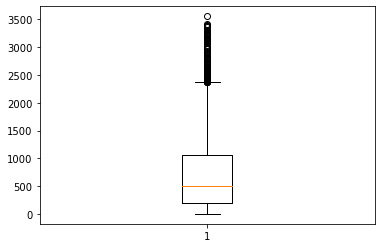

In [58]:
##finding outliers#
import matplotlib.pyplot as plt
plt.boxplot(bike['count'])

In [59]:
##for count column#
q1=bike['count'].quantile(0.25)
q1

191.0

In [60]:
q3=bike['count'].quantile(0.75)
q3

1065.25

In [61]:
iqr=q3-q1
iqr

874.25

In [62]:
high=q3+1.5*iqr
high

2376.625

In [63]:
mean=bike['count'].mean()
mean

704.6020547945205

In [64]:
out1=bike[(bike['count']>high)].values
out1

array([[2401, 18, 20.7, ..., 'Spring', 'No Holiday', 'Yes'],
       [2402, 18, 16.0, ..., 'Spring', 'No Holiday', 'Yes'],
       [2401, 18, 14.8, ..., 'Spring', 'No Holiday', 'Yes'],
       ...,
       [2415, 18, 14.5, ..., 'Autumn', 'No Holiday', 'Yes'],
       [2612, 18, 15.1, ..., 'Autumn', 'No Holiday', 'Yes'],
       [2632, 18, 17.3, ..., 'Autumn', 'No Holiday', 'Yes']], dtype=object)

In [65]:
bike['count'].replace(out1,mean,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x246a300a550>,
 'caps': [<matplotlib.lines.Line2D at 0x246a300ab50>,
 'boxes': [<matplotlib.lines.Line2D at 0x246a3c0e640>],
 'medians': [<matplotlib.lines.Line2D at 0x246a450d040>],
 'fliers': [<matplotlib.lines.Line2D at 0x246a450d580>],
 'means': []}

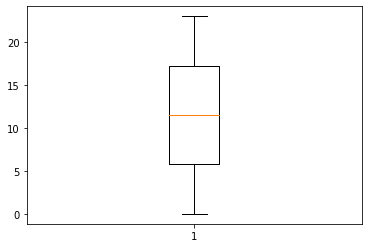

In [66]:
plt.boxplot(bike['hour'])

{'whiskers': [<matplotlib.lines.Line2D at 0x246a45a8b80>,
 'caps': [<matplotlib.lines.Line2D at 0x246a45c58e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x246a45a8400>],
 'medians': [<matplotlib.lines.Line2D at 0x246a45c57c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x246a45c5be0>],
 'means': []}

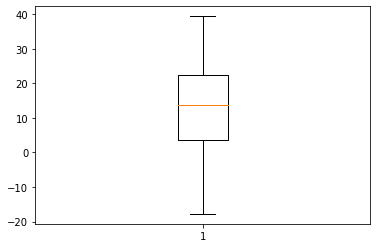

In [67]:
plt.boxplot(bike['temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x246a47dde20>,
 'caps': [<matplotlib.lines.Line2D at 0x246a3c4b1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x246a47dd670>],
 'medians': [<matplotlib.lines.Line2D at 0x246a3c4bd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x246a3c4bdc0>],
 'means': []}

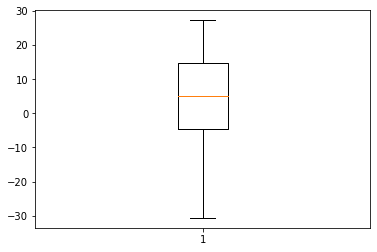

In [68]:
plt.boxplot(bike['dew'])

{'whiskers': [<matplotlib.lines.Line2D at 0x246a46ab910>,
 'caps': [<matplotlib.lines.Line2D at 0x246a468b670>,
 'boxes': [<matplotlib.lines.Line2D at 0x246a46ab3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x246a468b8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x246a468b4f0>],
 'means': []}

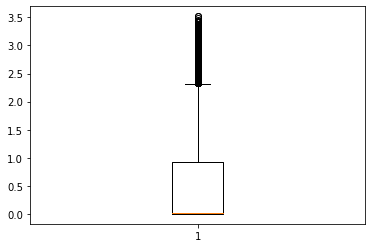

In [69]:
plt.boxplot(bike['solar'])

In [70]:
##for solar column#
q1=bike['solar'].quantile(0.25)
q1

0.0

In [71]:
q3=bike['solar'].quantile(0.75)
q3

0.93

In [72]:
iqr=q3-q1
iqr

0.93

In [73]:
high=q3+1.5*iqr
high

2.325

In [74]:
mean=bike['solar'].mean()
mean

0.5691107305936114

In [75]:
out2=bike[(bike['solar']>high)].values
out2

array([[212, 13, -2.4, ..., 'Winter', 'No Holiday', 'Yes'],
       [193, 13, -0.4, ..., 'Winter', 'Holiday', 'Yes'],
       [258, 14, -0.1, ..., 'Winter', 'Holiday', 'Yes'],
       ...,
       [1585, 13, 19.4, ..., 'Autumn', 'No Holiday', 'Yes'],
       [1417, 12, 18.4, ..., 'Autumn', 'No Holiday', 'Yes'],
       [1519, 13, 19.3, ..., 'Autumn', 'No Holiday', 'Yes']], dtype=object)

In [76]:
bike['solar'].replace(out2,mean,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x246a8e68b80>,
 'caps': [<matplotlib.lines.Line2D at 0x246a8f5ce80>,
 'boxes': [<matplotlib.lines.Line2D at 0x246a8e684c0>],
 'medians': [<matplotlib.lines.Line2D at 0x246a8f5ca30>],
 'fliers': [<matplotlib.lines.Line2D at 0x246a8f5cfa0>],
 'means': []}

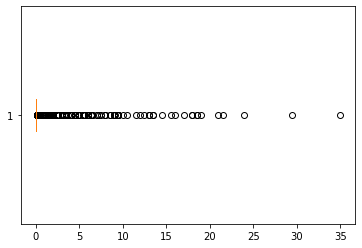

In [77]:
plt.boxplot(bike['rain'],vert=False)

In [78]:
##for rain column#
q1=bike['rain'].quantile(0.25)
q1

0.0

In [79]:
q3=bike['rain'].quantile(0.75)
q3

0.0

In [80]:
iqr=q3=q1
iqr

0.0

In [81]:
high=q3+1.5*iqr
high

0.0

In [82]:
mean=bike['rain'].mean()
mean

0.1486872146118721

In [83]:
out3=bike[(bike['rain']>high)].values
out3

array([[117, 3, 3.4, ..., 'Winter', 'No Holiday', 'Yes'],
       [13, 6, 3.4, ..., 'Winter', 'No Holiday', 'Yes'],
       [152, 9, 3.5, ..., 'Winter', 'No Holiday', 'Yes'],
       ...,
       [112, 3, 6.5, ..., 'Autumn', 'No Holiday', 'Yes'],
       [24, 9, 0.3, ..., 'Autumn', 'No Holiday', 'Yes'],
       [167, 12, 2.5, ..., 'Autumn', 'No Holiday', 'Yes']], dtype=object)

In [84]:
bike['rain'].replace(out3,mean,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x246a91924c0>,
 'caps': [<matplotlib.lines.Line2D at 0x246a9192ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x246a9192bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x246a91de040>],
 'fliers': [<matplotlib.lines.Line2D at 0x246a91de250>],
 'means': []}

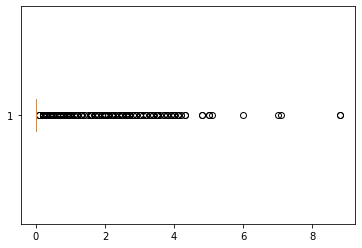

In [85]:
plt.boxplot(bike['snow'],vert=False)

In [86]:
##for snow column#
q1=bike['snow'].quantile(0.25)
q1

0.0

In [87]:
q3=bike['snow'].quantile(0.75)
q3

0.0

In [88]:
iqr=q3-q1
iqr

0.0

In [89]:
high=q3+1.5*iqr
high

0.0

In [90]:
mean=bike['snow'].mean()
mean

0.07506849315068483

In [91]:
out4=bike[(bike['snow']>high)].values
out4

array([[145, 0, -2.8, ..., 'Winter', 'No Holiday', 'Yes'],
       [144, 1, -3.0, ..., 'Winter', 'No Holiday', 'Yes'],
       [117, 2, -3.0, ..., 'Winter', 'No Holiday', 'Yes'],
       ...,
       [819, 7, 1.7, ..., 'Autumn', 'No Holiday', 'Yes'],
       [1524, 8, 2.0, ..., 'Autumn', 'No Holiday', 'Yes'],
       [795, 9, 3.1, ..., 'Autumn', 'No Holiday', 'Yes']], dtype=object)

In [92]:
bike['snow'].replace(out1,mean,inplace=True)

In [93]:
##Standardization#

In [94]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [95]:
bike3.iloc[:,0:9]= scale.fit_transform(bike3.iloc[:,0:9])

In [96]:
bike3.head()

,count,hour,temp,hum,wind,vis,dew,solar,rain,snow,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,holiday_No Holiday,workingday_No,workingday_Yes
0,0.071429,0.000000,0.220280,0.377551,0.297297,1.0,0.224913,0.0,0.0,0.0,0,0,0,1,0,1,0,1
1,0.057368,0.043478,0.215035,0.387755,0.108108,1.0,0.224913,0.0,0.0,0.0,0,0,0,1,0,1,0,1
2,0.048650,0.086957,0.206294,0.397959,0.135135,1.0,0.223183,0.0,0.0,0.0,0,0,0,1,0,1,0,1
3,0.030090,0.130435,0.202797,0.408163,0.121622,1.0,0.224913,0.0,0.0,0.0,0,0,0,1,0,1,0,1
4,0.021935,0.173913,0.206294,0.367347,0.310811,1.0,0.207612,0.0,0.0,0.0,0,0,0,1,0,1,0,1


# Data Validation#

In [97]:
x=bike3.iloc[:,1:18]

In [98]:
x

,hour,temp,hum,wind,vis,dew,solar,rain,snow,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,holiday_No Holiday,workingday_No,workingday_Yes
0,0.000000,0.220280,0.377551,0.297297,1.000000,0.224913,0.0,0.0,0.0,0,0,0,1,0,1,0,1
1,0.043478,0.215035,0.387755,0.108108,1.000000,0.224913,0.0,0.0,0.0,0,0,0,1,0,1,0,1
2,0.086957,0.206294,0.397959,0.135135,1.000000,0.223183,0.0,0.0,0.0,0,0,0,1,0,1,0,1
3,0.130435,0.202797,0.408163,0.121622,1.000000,0.224913,0.0,0.0,0.0,0,0,0,1,0,1,0,1
4,0.173913,0.206294,0.367347,0.310811,1.000000,0.207612,0.0,0.0,0.0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.826087,0.384615,0.346939,0.351351,0.946275,0.351211,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8756,0.869565,0.370629,0.377551,0.310811,1.000000,0.358131,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8757,0.913043,0.356643,0.397959,0.040541,0.713634,0.358131,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8758,0.956522,0.347902,0.418367,0.135135,0.928535,0.359862,0.0,0.0,0.0,1,0,0,0,0,1,0,1


In [99]:
y=bike3.iloc[:,0]

In [100]:
y

0       0.071429
1       0.057368
2       0.048650
3       0.030090
4       0.021935
          ...   
8755    0.282058
8756    0.214848
8757    0.195163
8758    0.200225
8759    0.164229
Name: count, Length: 8760, dtype: float64

In [101]:
##splitting the data in to training and testing#
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [102]:
x_test

,hour,temp,hum,wind,vis,dew,solar,rain,snow,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,holiday_No Holiday,workingday_No,workingday_Yes
4059,0.130435,0.498252,0.744898,0.175676,1.000000,0.633218,0.000000,0.0,0.0,0,1,0,0,0,1,0,1
6914,0.086957,0.690559,0.795918,0.135135,1.000000,0.833910,0.000000,0.0,0.0,1,0,0,0,0,1,0,1
233,0.739130,0.374126,0.663265,0.581081,0.524075,0.489619,0.008523,0.0,0.4,0,0,0,1,0,1,0,1
982,0.956522,0.141608,0.520408,0.378378,1.000000,0.219723,0.000000,0.0,0.0,0,0,0,1,0,1,0,1
5967,0.652174,0.898601,0.591837,0.486486,0.720223,0.946367,0.562500,0.0,0.0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,0.347826,0.480769,0.785714,0.216216,0.249366,0.629758,0.193182,0.0,0.0,0,1,0,0,0,1,1,0
5867,0.478261,0.928322,0.459184,0.229730,0.913330,0.901384,0.644886,0.0,0.0,0,0,1,0,0,1,0,1
3456,0.000000,0.482517,0.877551,0.175676,1.000000,0.659170,0.000000,0.0,0.0,0,1,0,0,0,1,0,1
7750,0.956522,0.526224,0.663265,0.229730,1.000000,0.629758,0.000000,0.0,0.0,1,0,0,0,0,1,0,1


In [103]:
y_test

4059    0.089989
6914    0.163105
233     0.063555
982     0.046400
5967    0.181665
          ...   
3152    0.000000
5867    0.153825
3456    0.059899
7750    0.374297
7728    0.220191
Name: count, Length: 1752, dtype: float64

# Modelling#

In [104]:
##model building#
##multiple Linear Regression#
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [105]:
#training the algorithm#
regressor=LinearRegression()

In [106]:
regressor.fit(x_train,y_train)

LinearRegression()

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [109]:
print(regressor.score(x_test,y_test))

0.5441983073248593


In [110]:
##l1 linear regression with Lasso#
from sklearn.linear_model import Lasso

In [111]:
lassomodel=Lasso()

In [112]:
lassomodel.fit(x_train,y_train)

Lasso()

In [113]:
print(lassomodel.score(x_test,y_test))

-0.0011246125352522007


In [114]:
from sklearn.linear_model import Ridge

In [115]:
ridgemodel=Ridge()

In [116]:
ridgemodel.fit(x_train,y_train)

Ridge()

In [117]:
print(ridgemodel.score(x_test,y_test)) 

0.5436935141782095


# comparing the model#

In [118]:
##comparing the models by visualization#
models=['linear','Ridge','Lasso']
scores=[regressor.score(x_test,y_test),ridgemodel.score(x_test,y_test),lassomodel.score(x_test,y_test)]

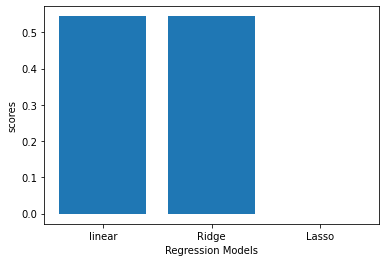

In [119]:
plt.bar(models,scores)
plt.xlabel('Regression Models')
plt.ylabel('scores')
plt.show()

In [120]:
##predictions#
y_pred = regressor.predict(x_test)

In [121]:
y_pred

array([0.12011719, 0.21569824, 0.14257812, ..., 0.05822754, 0.33276367,
       0.14306641])

In [122]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [123]:
df

,Actual,Predicted
4059,0.089989,0.120117
6914,0.163105,0.215698
233,0.063555,0.142578
982,0.046400,0.107910
5967,0.181665,0.379028
...,...,...
3152,0.000000,-0.140503
5867,0.153825,0.371582
3456,0.059899,0.058228
7750,0.374297,0.332764


In [124]:
import matplotlib as pyplot

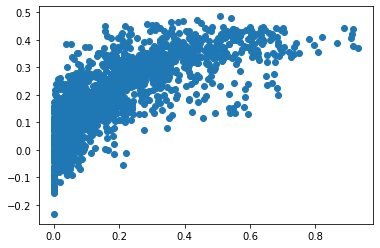

In [125]:
plt.scatter(y_test,y_pred)

# scoring factors#

In [126]:
##scoring factors#
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root mean squared error: 0.12282468693801411


In [127]:
##3less the error we can predict the model for the equation#
print('intercept:',regressor.intercept_)

intercept: -786510670151.7626


In [128]:
#getting coefficient value#
print('slope:',regressor.coef_)

slope: [ 1.76791740e-01  2.31457456e-01 -3.06871513e-01  4.07617838e-02
  1.04264240e-02  2.11534319e-01 -7.55113756e-02 -5.48801840e-01
  8.30991909e-03  6.20616832e+11  6.20616832e+11  6.20616832e+11
  6.20616832e+11  8.87431899e+09  8.87431899e+09  1.57019519e+11
  1.57019519e+11]


# Total Analysis#

In [ ]:
###Analysis for the given data#
#As can be seen from the plots and values above,we have founded that mean prediction error is more, this is for overall
range of bike count 0 to 800.#
The Rquared error for regression model is 12 that is only 12% of variance is able to be predicted for independent variables
54% score accuracy.so our model donot perform better.
our predictions are less than zero because we assumed the count using regression models.we have many outliers with large 
errors.we have predicted the number of bike counted for the different variables,if more number of bikes rented then it would
give better results for the data#

In [ ]:
####here the accuracy score is not good
#we can apply retuning methods
#we have many variables  by using PCA
#random forest algorithm#